In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/custom-galaxy-dataset/training_solutions_rev1.csv
/kaggle/input/custom-galaxy-dataset/images_training_rev1/images_training_rev1/824959.jpg
/kaggle/input/custom-galaxy-dataset/images_training_rev1/images_training_rev1/702195.jpg
/kaggle/input/custom-galaxy-dataset/images_training_rev1/images_training_rev1/752388.jpg
/kaggle/input/custom-galaxy-dataset/images_training_rev1/images_training_rev1/583664.jpg
/kaggle/input/custom-galaxy-dataset/images_training_rev1/images_training_rev1/330070.jpg
/kaggle/input/custom-galaxy-dataset/images_training_rev1/images_training_rev1/481945.jpg
/kaggle/input/custom-galaxy-dataset/images_training_rev1/images_training_rev1/109629.jpg
/kaggle/input/custom-galaxy-dataset/images_training_rev1/images_training_rev1/437610.jpg
/kaggle/input/custom-galaxy-dataset/images_training_rev1/images_training_rev1/214108.jpg
/kaggle/input/custom-galaxy-dataset/images_training_rev1/images_training_rev1/619582.jpg
/kaggle/input/custom-galaxy-dataset/images_tra

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

2025-05-06 07:29:25.198077: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746516565.416783      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746516565.482186      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


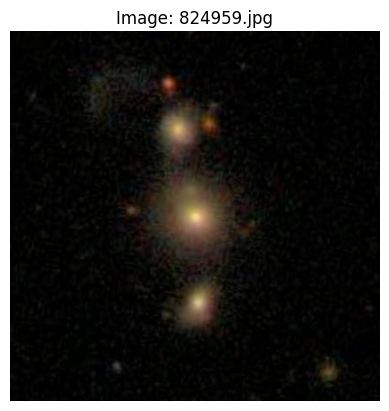

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to your images folder
image_folder = "/kaggle/input/custom-galaxy-dataset/images_training_rev1/images_training_rev1"

# Get all image files with valid extensions
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Load and display the first image
if image_files:
    img_path = os.path.join(image_folder, image_files[0])
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(f"Image: {image_files[0]}")
    plt.show()
else:
    print("No image files found in the folder.")


In [4]:
data = pd.read_csv("/kaggle/input/custom-galaxy-dataset/training_solutions_rev1.csv")

#data = pd.read_csv('training_solutions_rev1.csv')
data.head(5)

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0    100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1    100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2    100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3    100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4    100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   

   Class3.2  Class4.1  Class4.2  ...  Class9.3  Class10.1  Class10.2  \
0  0.578401  0.418398  0.198455  ...  0.000000   0.279952   0.138445   
1  0.165229  0.591328  0.041271  ...  0.018764   0.000000   0.131378   
2  0.177352  0.000000  0.177352  ...  0.000000   0.000000   0.000000   
3  0.129071  0.189098  0.049466  ...  0.000000   0.094549   0.000000   
4  0.000000  0.000000  0.000000  ...  0.000000   0.000000   0.000000   

   Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  
0   0.000000   0.000000   0.092886        0.0        0.0        0.0   0.325512  
1   0.459950   0.000000   0.591328        0.0        0.0        0.0   0.000000  
2   0.000000   0.000000   0.000000        0.0        0.0        0.0   0.000000  
3   0.094549   0.189098   0.000000        0.0        0.0        0.0   0.000000  
4   0.000000   0.000000   0.000000        0.0        0.0        0.0   0.000000  

[5 rows x 38 columns]

In [5]:
data.shape

(61578, 38)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61578 entries, 0 to 61577
Data columns (total 38 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GalaxyID   61578 non-null  int64  
 1   Class1.1   61578 non-null  float64
 2   Class1.2   61578 non-null  float64
 3   Class1.3   61578 non-null  float64
 4   Class2.1   61578 non-null  float64
 5   Class2.2   61578 non-null  float64
 6   Class3.1   61578 non-null  float64
 7   Class3.2   61578 non-null  float64
 8   Class4.1   61578 non-null  float64
 9   Class4.2   61578 non-null  float64
 10  Class5.1   61578 non-null  float64
 11  Class5.2   61578 non-null  float64
 12  Class5.3   61578 non-null  float64
 13  Class5.4   61578 non-null  float64
 14  Class6.1   61578 non-null  float64
 15  Class6.2   61578 non-null  float64
 16  Class7.1   61578 non-null  float64
 17  Class7.2   61578 non-null  float64
 18  Class7.3   61578 non-null  float64
 19  Class8.1   61578 non-null  float64
 20  Class8

In [7]:
round(data.describe(),3)

GalaxyID   Class1.1   Class1.2   Class1.3   Class2.1   Class2.2  \
count   61578.000  61578.000  61578.000  61578.000  61578.000  61578.000   
mean   550179.708      0.433      0.542      0.025      0.106      0.436   
std    258724.130      0.284      0.296      0.038      0.213      0.302   
min    100008.000      0.000      0.000      0.000      0.000      0.000   
25%    327874.250      0.176      0.281      0.000      0.000      0.168   
50%    551933.000      0.417      0.559      0.015      0.000      0.395   
75%    773232.000      0.679      0.811      0.034      0.085      0.695   
max    999967.000      1.000      1.000      0.935      1.000      1.000   

        Class3.1   Class3.2   Class4.1   Class4.2  ...   Class9.3  Class10.1  \
count  61578.000  61578.000  61578.000  61578.000  ...  61578.000  61578.000   
mean       0.103      0.333      0.216      0.220  ...      0.033      0.092   
std        0.177      0.248      0.286      0.180  ...      0.098      0.145   
min        0.000      0.000      0.000      0.000  ...      0.000      0.000   
25%        0.000      0.123      0.000      0.073  ...      0.000      0.000   
50%        0.000      0.289      0.093      0.184  ...      0.000      0.000   
75%        0.135      0.517      0.330      0.339  ...      0.000      0.147   
max        1.000      1.000      1.000      0.958  ...      0.902      0.950   

       Class10.2  Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  \
count  61578.000  61578.000  61578.000  61578.000  61578.000  61578.000   
mean       0.084      0.040      0.015      0.094      0.018      0.008   
std        0.140      0.100      0.052      0.194      0.067      0.038   
min        0.000      0.000      0.000      0.000      0.000      0.000   
25%        0.000      0.000      0.000      0.000      0.000      0.000   
50%        0.000      0.000      0.000      0.000      0.000      0.000   
75%        0.127      0.031      0.000      0.099      0.000      0.000   
max        0.877      0.997      0.886      1.000      0.976      0.957   

       Class11.5  Class11.6  
count  61578.000  61578.000  
mean       0.007      0.074  
std        0.037      0.107  
min        0.000      0.000  
25%        0.000      0.000  
50%        0.000      0.000  
75%        0.000      0.129  
max        0.939      0.753  

[8 rows x 38 columns]

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


In [9]:
# Define paths
image_dir = "/kaggle/input/custom-galaxy-dataset/images_training_rev1/images_training_rev1"
csv_path = "/kaggle/input/custom-galaxy-dataset/training_solutions_rev1.csv"



In [10]:
# Load the CSV data
df = pd.read_csv(csv_path)

# Convert GalaxyID to string for matching with image filenames
df['GalaxyID'] = df['GalaxyID'].astype(str)

# Check the first few rows to understand the structure
print(f"Dataset shape: {df.shape}")
print(df.head())




Dataset shape: (61578, 38)
  GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0   100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1   100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2   100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3   100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4   100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   

   Class3.2  Class4.1  Class4.2  ...  Class9.3  Class10.1  Class10.2  \
0  0.578401  0.418398  0.198455  ...  0.000000   0.279952   0.138445   
1  0.165229  0.591328  0.041271  ...  0.018764   0.000000   0.131378   
2  0.177352  0.000000  0.177352  ...  0.000000   0.000000   0.000000   
3  0.129071  0.189098  0.049466  ...  0.000000   0.094549   0.000000   
4  0.000000  0.000000  0.000000  ...  0.000000   0.000000   0.000000   

   Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  
0   0.000000  

In [11]:
# Check if all images exist
image_files = os.listdir(image_dir)
image_ids = [os.path.splitext(f)[0] for f in image_files if f.endswith('.jpg')]
print(f"Found {len(image_files)} images in directory")
print(f"Number of galaxies in CSV: {len(df)}")

# Find the intersection of available images and CSV entries
valid_ids = set(df['GalaxyID']).intersection(set(image_ids))
print(f"Number of galaxies with both image and data: {len(valid_ids)}")

Found 61578 images in directory
Number of galaxies in CSV: 61578
Number of galaxies with both image and data: 61578


# Step 3: Data Preprocessing

In [12]:
# Define image preprocessing parameters
IMG_SIZE = 224  # Standard size for many pre-trained models
BATCH_SIZE = 32

# Function to preprocess images
def preprocess_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
    img = tf.cast(img, tf.float32) / 255.0  # Normalize to [0,1]
    return img

# Create a list of image paths and corresponding labels
image_paths = []
labels = []

for idx, row in df.iterrows():
    galaxy_id = row['GalaxyID']
    image_path = os.path.join(image_dir, f"{galaxy_id}.jpg")
    
    # Only include images that actually exist
    if os.path.exists(image_path):
        image_paths.append(image_path)
        
        # Extract all the class probabilities (all columns except GalaxyID)
        label = row.values[1:].astype(np.float32)
        labels.append(label)

# Convert lists to numpy arrays
image_paths = np.array(image_paths)
labels = np.array(labels)

print(f"Final dataset size: {len(image_paths)} images with labels")


Final dataset size: 61578 images with labels


# Step 4: Split Data into Training and Validation Sets

In [13]:
# Split the data into training and validation sets
train_paths, val_paths, train_labels, val_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state= 111
)

print(f"Training set: {len(train_paths)} images")
print(f"Validation set: {len(val_paths)} images")



Training set: 49262 images
Validation set: 12316 images


In [14]:
# Create TensorFlow datasets
def create_dataset(image_paths, labels, batch_size, is_training=True):
    def load_and_preprocess(path, label):
        img = preprocess_image(path)
        return img, label
    
    # Create dataset from tensors
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    
    # Map the preprocessing function
    dataset = dataset.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    
    if is_training:
        # Shuffle and repeat for training
        dataset = dataset.shuffle(buffer_size=1000).repeat()
    
    # Batch the data
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    
    return dataset

# Create training and validation datasets
train_dataset = create_dataset(train_paths, train_labels, BATCH_SIZE)
val_dataset = create_dataset(val_paths, val_labels, BATCH_SIZE, is_training=False)


I0000 00:00:1746516624.037749      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1746516624.038477      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


# Step 5: Building the Model

In [15]:
def build_galaxy_model(input_shape, num_classes):
    # Use EfficientNetB0 as the base model
    base_model = EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape
    )
    
    # Freeze the base model layers
    base_model.trainable = False
    
    # Create the model
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='sigmoid')  # Sigmoid for multi-label probabilities
    ])
    
    # Compile the model
    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss='mean_squared_error',  # MSE is appropriate for probability regression
        metrics=['mae']  # Mean Absolute Error
    )
    
    return model

# Build the model
input_shape = (IMG_SIZE, IMG_SIZE, 3)
num_classes = train_labels.shape[1]  # Number of class probabilities
model = build_galaxy_model(input_shape, num_classes)

# Print model summary
model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 37)                  │           9,509 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,854,472 (18.52 MB)

 Trainable params: 800,805 (3.05 MB)

 Non-trainable params: 4,053,667 (15.46 MB)

In [16]:
from tensorflow.keras.utils import plot_model


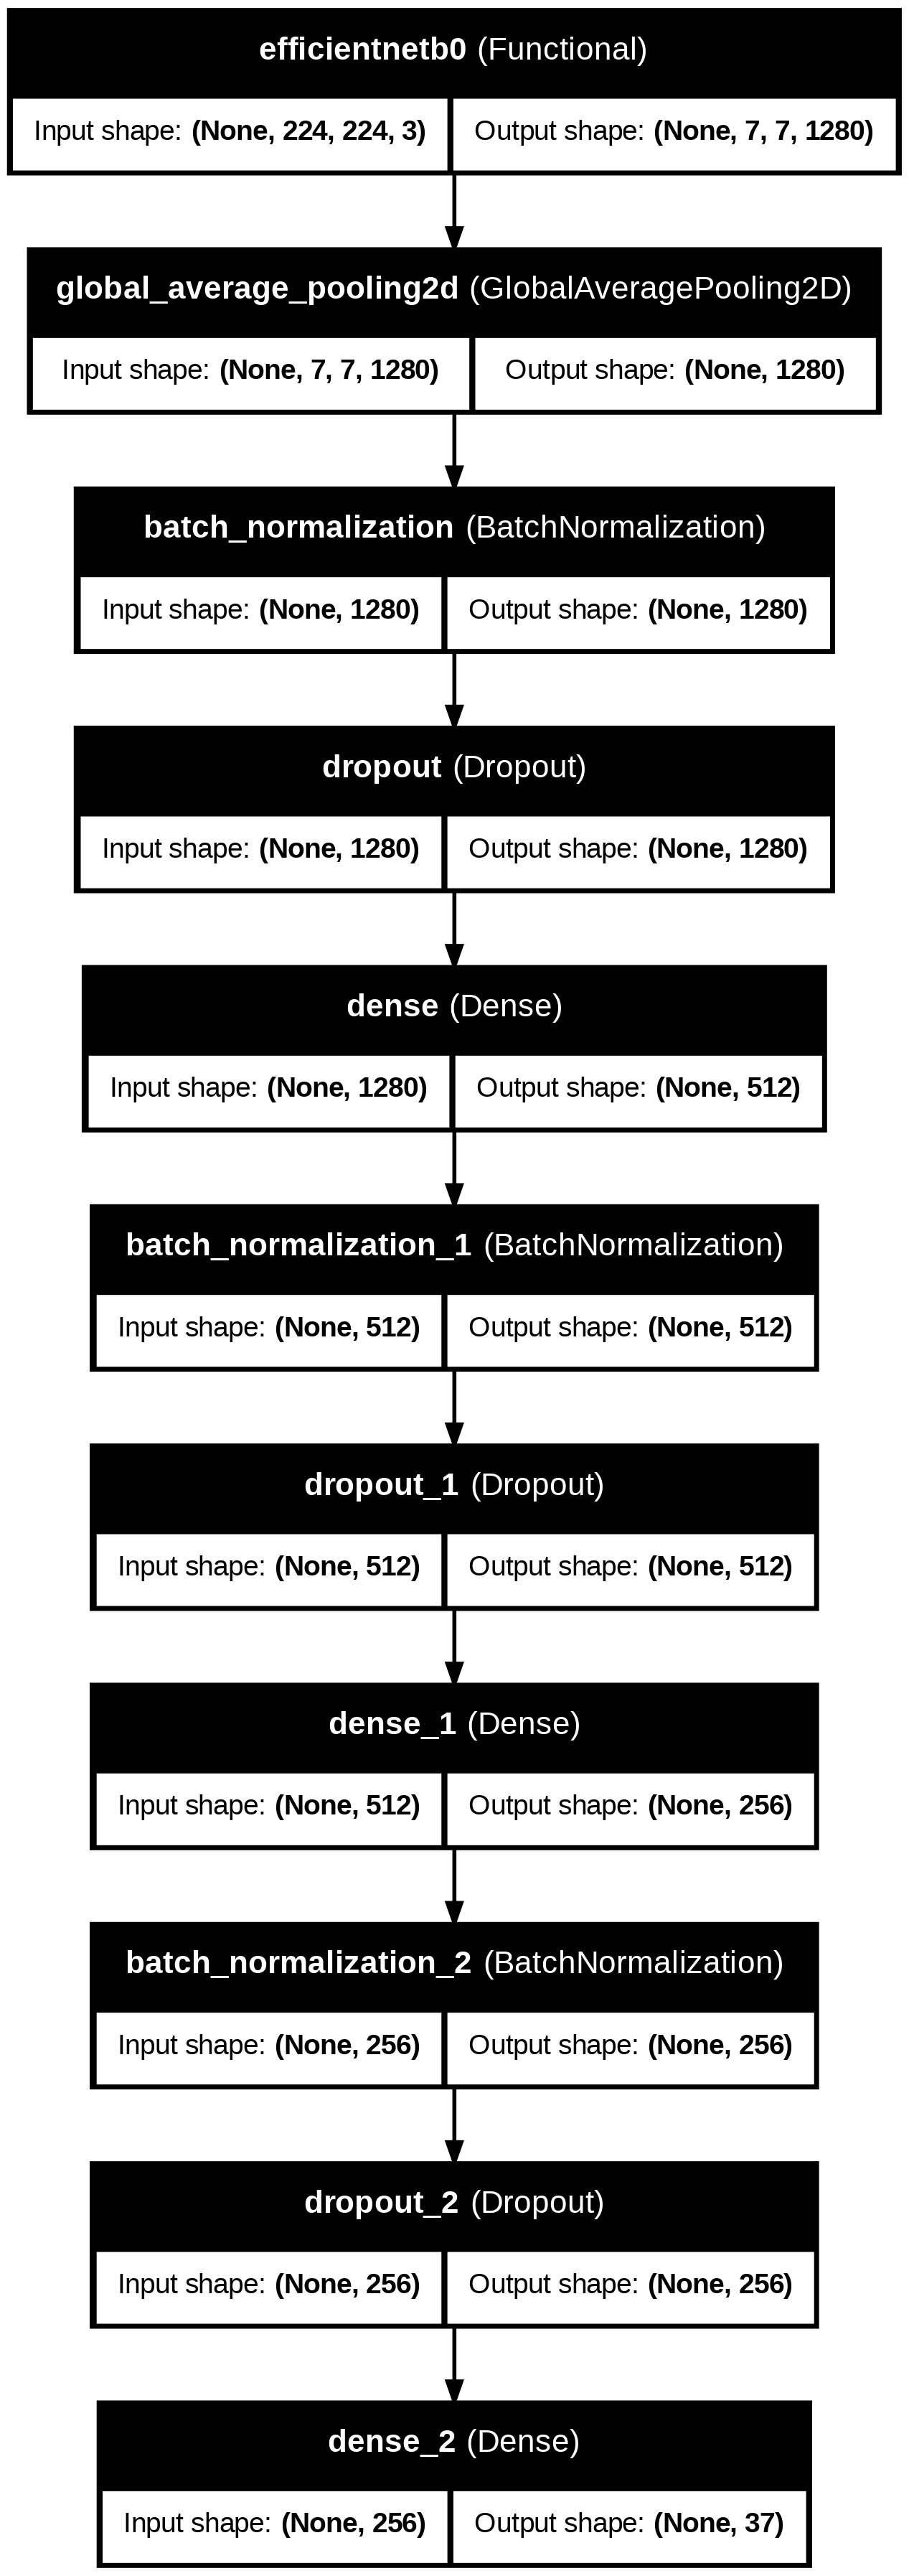

In [17]:
# Save the model architecture as a PNG file
plot_model(model, to_file='galaxy_model_architecture.png', show_shapes=True, show_layer_names=True)


In [18]:
from IPython.display import FileLink
FileLink('galaxy_model_architecture.png')


/kaggle/working/galaxy_model_architecture.png

# Step 6: Training the Model

In [19]:
# Set up callbacks for training
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.1, patience=5)
    # Removed ModelCheckpoint
]

# Calculate steps per epoch
steps_per_epoch = len(train_paths) // BATCH_SIZE
validation_steps = len(val_paths) // BATCH_SIZE

# Train the model
history = model.fit(
    train_dataset,
    epochs=15,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    callbacks=callbacks
)

# save model later if needed
# model.save('galaxy_model_final.keras')


Epoch 1/15


I0000 00:00:1746516648.353860      64 service.cc:148] XLA service 0x7cfd800151a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746516648.354796      64 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1746516648.354821      64 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1746516650.234702      64 cuda_dnn.cc:529] Loaded cuDNN version 90300


   3/1539 ━━━━━━━━━━━━━━━━━━━━ 1:37 63ms/step - loss: 0.2482 - mae: 0.4221

I0000 00:00:1746516661.295173      64 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1539/1539 ━━━━━━━━━━━━━━━━━━━━ 141s 71ms/step - loss: 0.0777 - mae: 0.1802 - val_loss: 0.0269 - val_mae: 0.1031 - learning_rate: 0.0010
Epoch 2/15
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - loss: 0.0281 - mae: 0.1041 - val_loss: 0.0290 - val_mae: 0.1049 - learning_rate: 0.0010
Epoch 3/15
   3/1539 ━━━━━━━━━━━━━━━━━━━━ 1:13 48ms/step - loss: 0.0301 - mae: 0.1068

/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1539/1539 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - loss: 0.0277 - mae: 0.1036 - val_loss: 0.0268 - val_mae: 0.1033 - learning_rate: 0.0010
Epoch 4/15
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 55s 36ms/step - loss: 0.0274 - mae: 0.1035 - val_loss: 0.0289 - val_mae: 0.1047 - learning_rate: 0.0010
Epoch 5/15
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - loss: 0.0272 - mae: 0.1035 - val_loss: 0.0268 - val_mae: 0.1033 - learning_rate: 0.0010
Epoch 6/15
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 55s 36ms/step - loss: 0.0271 - mae: 0.1035 - val_loss: 0.0290 - val_mae: 0.1066 - learning_rate: 0.0010
Epoch 7/15
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - loss: 0.0269 - mae: 0.1035 - val_loss: 0.0268 - val_mae: 0.1041 - learning_rate: 1.0000e-04
Epoch 8/15
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 55s 36ms/step - loss: 0.0269 - mae: 0.1036 - val_loss: 0.0289 - val_mae: 0.1057 - learning_rate: 1.0000e-04
Epoch 9/15
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 66s 43ms/step - loss: 0.0268 - mae: 0.1035 - val_loss: 0.0268 - val_mae: 0.1040 - lea

# Step 7: Evaluate the Model

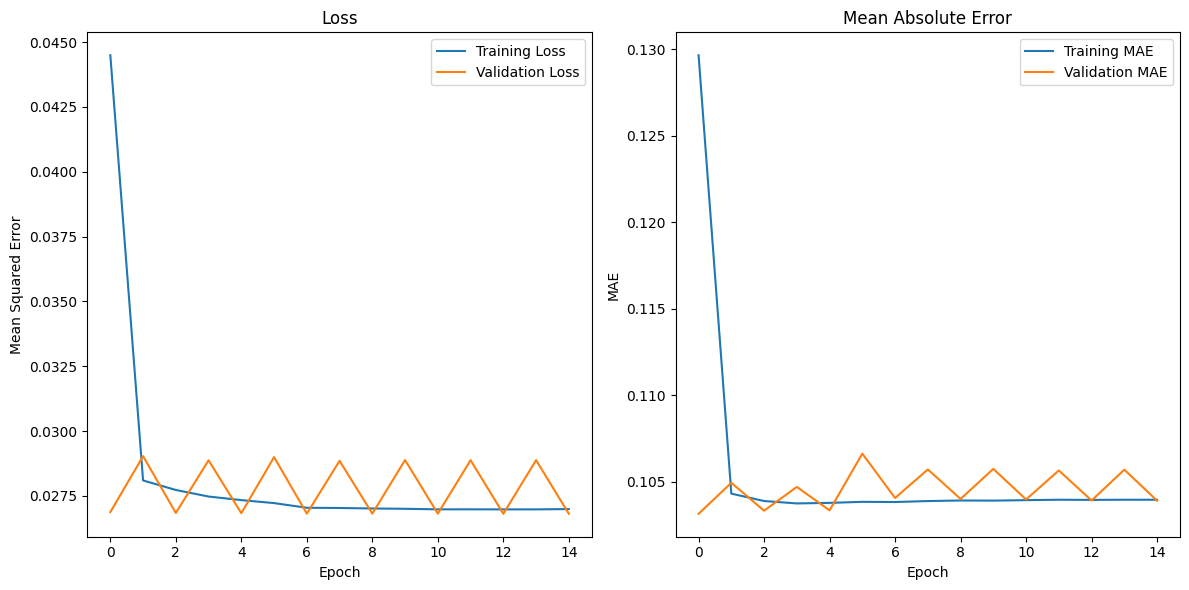

384/384 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - loss: 0.0269 - mae: 0.1040
Validation Loss (MSE): 0.0268
Validation MAE: 0.1039


In [20]:
# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 6))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    
    # Plot MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Mean Absolute Error')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()

plot_history(history)

# Evaluate on validation set
val_loss, val_mae = model.evaluate(val_dataset, steps=validation_steps)
print(f"Validation Loss (MSE): {val_loss:.4f}")
print(f"Validation MAE: {val_mae:.4f}")


In [21]:
import numpy as np
from sklearn.metrics import accuracy_score

# Get predictions from model
y_pred_probs = model.predict(val_dataset, steps=validation_steps)
y_pred = (y_pred_probs > 0.5).astype(int)

# Get true labels
y_true = np.vstack([y for x, y in val_dataset.take(validation_steps)])

# Compute multi-label accuracy (exact match)
exact_match_accuracy = np.mean(np.all(y_true == y_pred, axis=1))
print(f"Exact Match Accuracy: {exact_match_accuracy:.4f}")


384/384 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step
Exact Match Accuracy: 0.0000


# Step 8: Fine-tuning the Model


In [22]:
# Unfreeze some layers of the base model for fine-tuning
base_model = model.layers[0]
base_model.trainable = True

# Freeze earlier layers, unfreeze later layers
for layer in base_model.layers[:-20]:  # Keep the last 20 layers trainable
    layer.trainable = False

# Recompile with a lower learning rate
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),  # Lower learning rate for fine-tuning
    loss='mean_squared_error',
    metrics=['mae']
)




Epoch 1/20
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 115s 53ms/step - loss: 0.0268 - mae: 0.1035 - val_loss: 0.0268 - val_mae: 0.1039 - learning_rate: 1.0000e-04
Epoch 2/20
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 66s 43ms/step - loss: 0.0268 - mae: 0.1035 - val_loss: 0.0289 - val_mae: 0.1060 - learning_rate: 1.0000e-04
Epoch 3/20
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 74s 48ms/step - loss: 0.0268 - mae: 0.1036 - val_loss: 0.0268 - val_mae: 0.1045 - learning_rate: 1.0000e-04
Epoch 4/20
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step - loss: 0.0267 - mae: 0.1035 - val_loss: 0.0289 - val_mae: 0.1058 - learning_rate: 1.0000e-04
Epoch 5/20
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 74s 48ms/step - loss: 0.0267 - mae: 0.1036 - val_loss: 0.0268 - val_mae: 0.1040 - learning_rate: 1.0000e-04
Epoch 6/20
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step - loss: 0.0268 - mae: 0.1037 - val_loss: 0.0289 - val_mae: 0.1061 - learning_rate: 1.0000e-04
Epoch 7/20
1539/1539 ━━━━━━━━━━━━━━━━━━━━ 75s 49ms/step - loss: 0.0268 - mae: 0.1039 - val_loss: 0.

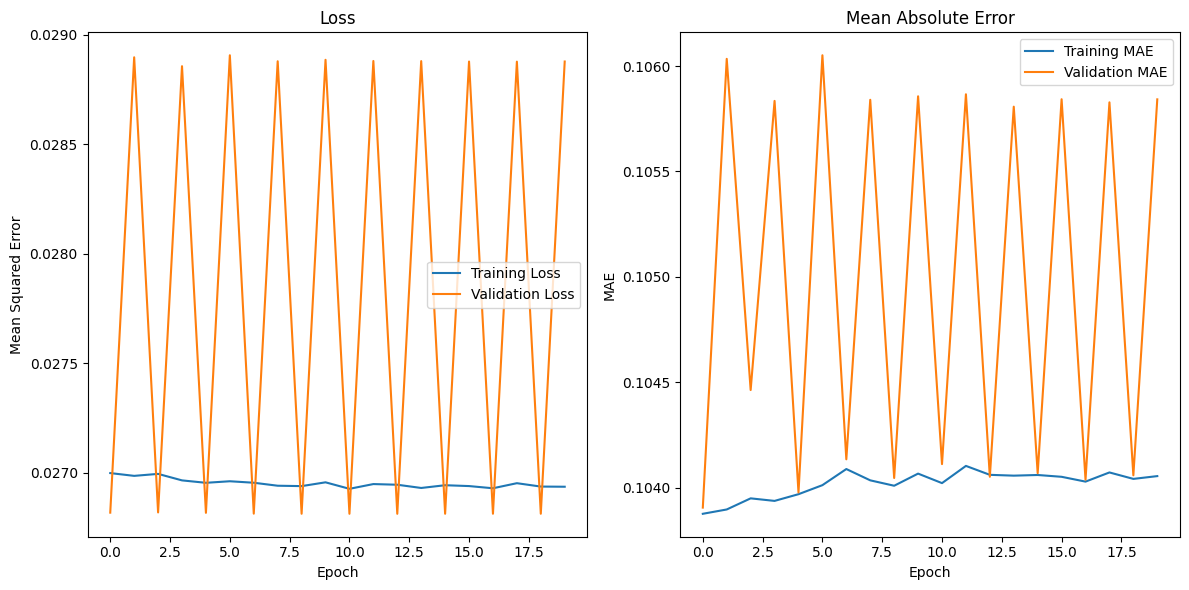

In [23]:
# Fine-tune the model
history_fine = model.fit(
    train_dataset,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    callbacks=callbacks
)

# Save the fine-tuned model
# model.save('galaxy_model_finetuned.h5')

# Plot fine-tuning history
plot_history(history_fine)

In [24]:
exact_match_accuracy = np.mean(np.all(y_true == y_pred, axis=1))
print(f"Exact Match Accuracy: {exact_match_accuracy:.4f}")


Exact Match Accuracy: 0.0000


# Step 9: Evaluate Performance for Each Question Type

In [25]:
# Function to evaluate model performance for each question type
def evaluate_by_question(model, dataset, steps, column_names):
    # Get predictions and true labels
    all_predictions = []
    all_labels = []
    
    for images, labels in dataset.take(steps):
        predictions = model.predict(images, verbose=0)
        all_predictions.append(predictions)
        all_labels.append(labels)
    
    predictions = np.vstack(all_predictions)
    true_labels = np.vstack(all_labels)
    
    # Define question indices
    q1_indices = [0, 1, 2]  # Class1.1-1.3 (Galaxy Type)
    q2_indices = [3, 4]  # Class2.1-2.2 (Roundness)
    q4_indices = [7, 8]  # Class4.1-4.2 (Edge-on)
    q5_indices = [9, 10]  # Class5.1-5.2 (Bar)
    q6_indices = [11, 12]  # Class6.1-6.2 (Spiral Pattern)
    q7_indices = [13, 14, 15, 16, 17, 18]  # Class7.1-7.6 (Spiral Arms)
    q8_indices = [19, 20, 21, 22]  # Class8.1-8.4 (Bulge)
    
    # Calculate MSE per question
    results = {
        "Q1 (Galaxy Type)": np.mean((predictions[:, q1_indices] - true_labels[:, q1_indices])**2),
        "Q2 (Roundness)": np.mean((predictions[:, q2_indices] - true_labels[:, q2_indices])**2),
        "Q4 (Edge-on)": np.mean((predictions[:, q4_indices] - true_labels[:, q4_indices])**2),
        "Q5 (Bar)": np.mean((predictions[:, q5_indices] - true_labels[:, q5_indices])**2),
        "Q6 (Spiral Pattern)": np.mean((predictions[:, q6_indices] - true_labels[:, q6_indices])**2),
        "Q7 (Spiral Arms)": np.mean((predictions[:, q7_indices] - true_labels[:, q7_indices])**2),
        "Q8 (Bulge)": np.mean((predictions[:, q8_indices] - true_labels[:, q8_indices])**2)
    }
    
    # Print results
    print("Performance by Question Type (MSE):")
    for question, mse in results.items():
        print(f"{question}: {mse:.4f}")
    
    return results

# Get column names (excluding GalaxyID)
column_names = df.columns[1:].tolist()

# Evaluate by question
question_results = evaluate_by_question(model, val_dataset, validation_steps, column_names)


Performance by Question Type (MSE):
Q1 (Galaxy Type): 0.0561
Q2 (Roundness): 0.0684
Q4 (Edge-on): 0.0569
Q5 (Bar): 0.0222
Q6 (Spiral Pattern): 0.0182
Q7 (Spiral Arms): 0.0382
Q8 (Bulge): 0.0045


# Step 10: Make Predictions and Create Submission File

In [26]:
def create_submission(model, test_dir, output_file='submission.csv'):
    # Get all image files in the test directory
    test_files = [f for f in os.listdir(test_dir) if f.endswith('.jpg')]
    
    # Create a DataFrame for submission with the same columns as the training data
    submission_df = pd.DataFrame()
    submission_df['GalaxyID'] = [os.path.splitext(f)[0] for f in test_files]
    
    # Get column names from the training data (excluding GalaxyID)
    columns = df.columns[1:].tolist()
    
    # Initialize columns with zeros
    for col in columns:
        submission_df[col] = 0.0
    
    # Process images in batches for efficiency
    batch_size = 32
    num_batches = (len(test_files) + batch_size - 1) // batch_size
    
    for batch_idx in tqdm(range(num_batches), desc="Processing test images"):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, len(test_files))
        batch_files = test_files[start_idx:end_idx]
        
        # Prepare batch images
        batch_images = []
        for file in batch_files:
            image_path = os.path.join(test_dir, file)
            img = preprocess_image(image_path)
            batch_images.append(img)
        
        # Convert to tensor and predict
        batch_tensor = tf.stack(batch_images)
        batch_predictions = model.predict(batch_tensor, verbose=0)
        
        # Add predictions to the submission DataFrame
        for i, file in enumerate(batch_files):
            galaxy_id = os.path.splitext(file)[0]
            idx = submission_df.index[submission_df['GalaxyID'] == galaxy_id].tolist()[0]
            submission_df.loc[idx, columns] = batch_predictions[i]
    
    # Save to CSV
    submission_df.to_csv(output_file, index=False)
    print(f"Submission file created: {output_file}")

# Example usage (assuming you have a test_images directory)
# create_submission(model, 'test_images', 'galaxy_zoo_submission.csv')


# Step 11: Visualize Predictions for Sample Images

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


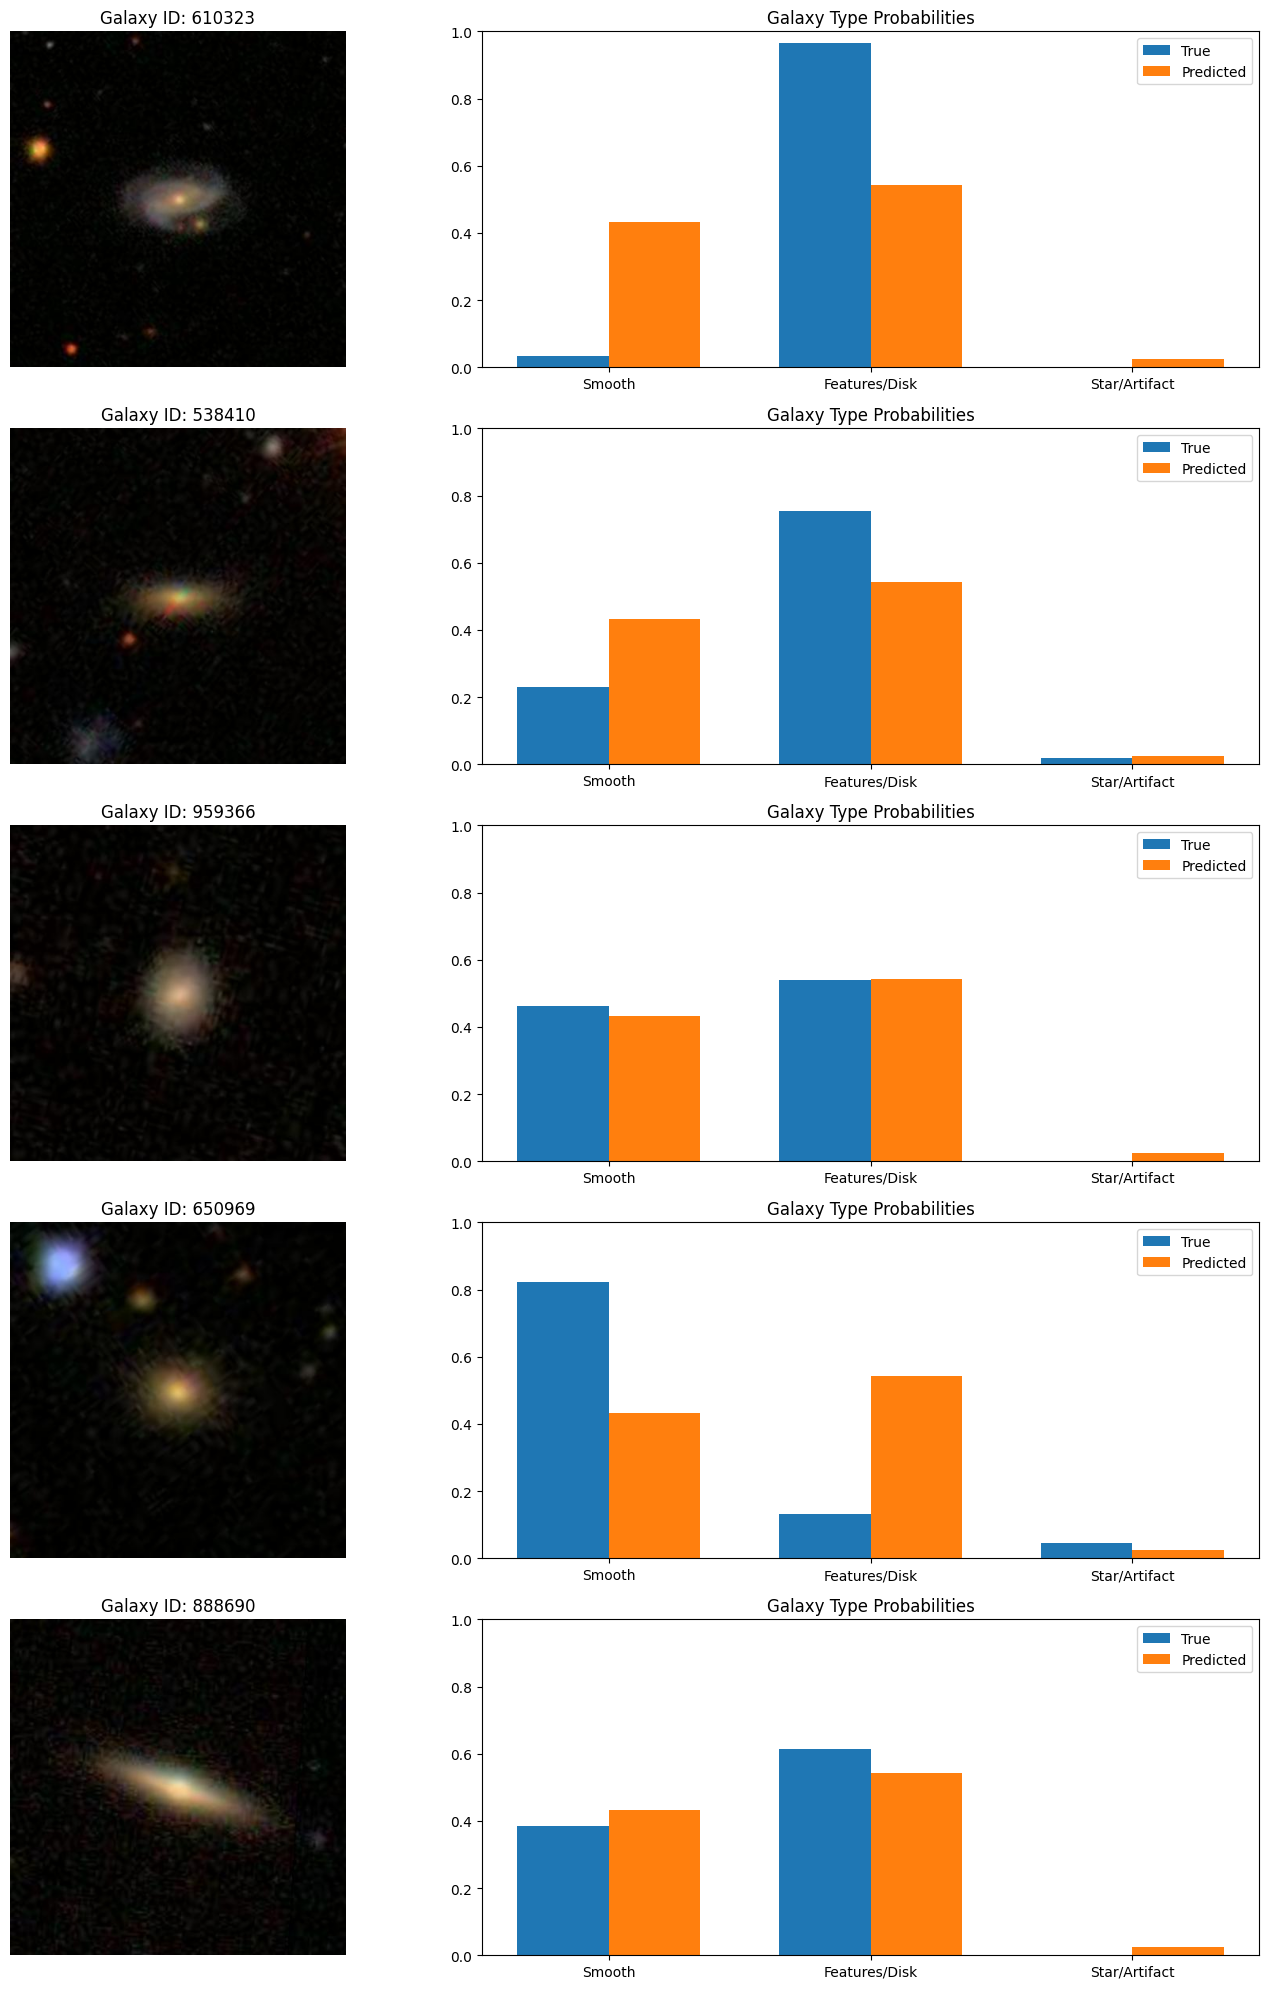

In [27]:
def visualize_predictions(model, image_paths, true_labels, num_samples=5):
    """Visualize predictions for a few sample images"""
    # Randomly select samples
    indices = np.random.choice(len(image_paths), num_samples, replace=False)
    
    plt.figure(figsize=(15, num_samples * 4))
    
    for i, idx in enumerate(indices):
        # Get the image and true label
        img_path = image_paths[idx]
        true_label = true_labels[idx]
        
        # Make prediction
        img = preprocess_image(img_path)
        img_batch = tf.expand_dims(img, axis=0)
        pred_label = model.predict(img_batch)[0]
        
        # Display the image
        plt.subplot(num_samples, 2, 2*i+1)
        img_display = plt.imread(img_path)
        plt.imshow(img_display)
        plt.title(f"Galaxy ID: {os.path.basename(img_path).split('.')[0]}")
        plt.axis('off')
        
        # Display the predictions for main galaxy type (Q1)
        plt.subplot(num_samples, 2, 2*i+2)
        
        categories = ['Smooth', 'Features/Disk', 'Star/Artifact']
        true_probs = true_label[0:3]
        pred_probs = pred_label[0:3]
        
        x = np.arange(len(categories))
        width = 0.35
        
        plt.bar(x - width/2, true_probs, width, label='True')
        plt.bar(x + width/2, pred_probs, width, label='Predicted')
        plt.xticks(x, categories)
        plt.ylim(0, 1)
        plt.legend()
        plt.title('Galaxy Type Probabilities')
    
    plt.tight_layout()
    plt.savefig('prediction_samples.png')
    plt.show()

# Visualize predictions for a few validation samples
visualize_predictions(model, val_paths, val_labels)


# Step 12: Analyze Multi-Class Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


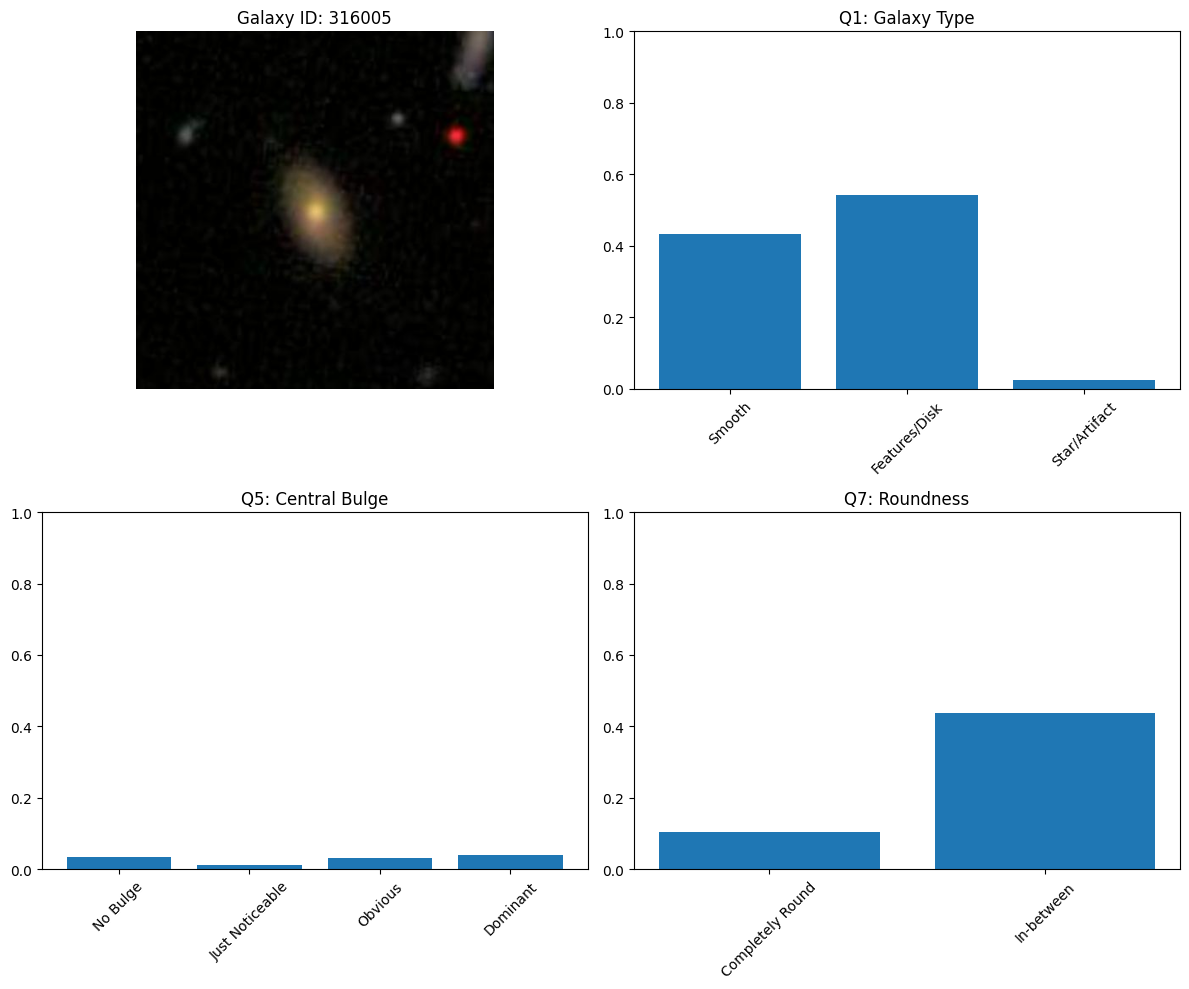

In [28]:
def analyze_multiclass_predictions(model, image_path, column_names):
    """Analyze predictions for all multi-class questions for a single image"""
    # Load and preprocess the image
    img = preprocess_image(image_path)
    img_batch = tf.expand_dims(img, axis=0)
    
    # Make prediction
    pred = model.predict(img_batch)[0]
    
    # Create a dictionary of predictions
    pred_dict = {col: val for col, val in zip(column_names, pred)}
    
    # Analyze each multi-class question
    results = {}
    
    # Q1: Galaxy Type (3 classes)
    q1_cols = ['Class1.1', 'Class1.2', 'Class1.3']
    q1_labels = ['Smooth', 'Features/Disk', 'Star/Artifact']
    q1_probs = [pred_dict[col] for col in q1_cols]
    results['Q1: Galaxy Type'] = dict(zip(q1_labels, q1_probs))
    
    # Q5: Central Bulge (4 classes)
    q5_cols = ['Class8.1', 'Class8.2', 'Class8.3', 'Class8.4']
    q5_labels = ['No Bulge', 'Just Noticeable', 'Obvious', 'Dominant']
    q5_probs = [pred_dict[col] for col in q5_cols]
    results['Q5: Central Bulge'] = dict(zip(q5_labels, q5_probs))
    
    # Q7: Roundness (3 classes)
    q7_cols = ['Class2.1', 'Class2.2']
    q7_labels = ['Completely Round', 'In-between', 'Cigar-shaped']
    q7_probs = [pred_dict[col] for col in q7_cols]
    results['Q7: Roundness'] = dict(zip(q7_labels, q7_probs))
    
    # Q11: Spiral Arms (6 classes)
    q11_cols = ['Class7.1', 'Class7.2', 'Class7.3']
    q11_labels = ['1 Arm', '2 Arms', '3 Arms']
    q11_probs = [pred_dict[col] for col in q11_cols]
    results['Q11: Spiral Arms'] = dict(zip(q11_labels, q11_probs))
    
    # Display the image
    plt.figure(figsize=(12, 10))
    
    plt.subplot(2, 2, 1)
    img_display = plt.imread(image_path)
    plt.imshow(img_display)
    plt.title(f"Galaxy ID: {os.path.basename(image_path).split('.')[0]}")
    plt.axis('off')
    
    # Plot each multi-class question
    positions = [(2, 2, 2), (2, 2, 3), (2, 2, 4)]
    
    for (question, probs), pos in zip(list(results.items())[:3], positions):
        plt.subplot(*pos)
        labels = list(probs.keys())
        values = list(probs.values())
        
        plt.bar(range(len(labels)), values)
        plt.xticks(range(len(labels)), labels, rotation=45)
        plt.ylim(0, 1)
        plt.title(question)
    
    plt.tight_layout()
    plt.savefig('multiclass_analysis.png')
    plt.show()
    
    return results

# Example usage (for a sample validation image)
column_names = df.columns[1:].tolist()
sample_image = val_paths[0]
multiclass_results = analyze_multiclass_predictions(model, sample_image, column_names)


# Step 13: Enforce Decision Tree Logic (Optional)

In [29]:
def enforce_decision_tree(probabilities, column_names):
    """Enforce decision tree logic on predictions"""
    # Create a copy to avoid modifying the original
    adjusted = probabilities.copy()
    
    # Convert to dictionary for easier access
    prob_dict = {col: val for col, val in zip(column_names, adjusted)}
    
    # Q1 influences all other questions
    smooth_prob = prob_dict['Class1.1']
    features_prob = prob_dict['Class1.2']
    star_prob = prob_dict['Class1.3']
    
    # Ensure Q1 probabilities sum to 1.0
    total_q1 = smooth_prob + features_prob + star_prob
    if total_q1 > 0:
        prob_dict['Class1.1'] = smooth_prob / total_q1
        prob_dict['Class1.2'] = features_prob / total_q1
        prob_dict['Class1.3'] = star_prob / total_q1
    
    # Smooth galaxies (Q1.1) should only influence Q7 (roundness)
    if smooth_prob > 0.5:
        # Scale down probabilities for feature-related questions
        feature_classes = [col for col in column_names if col.startswith(('Class3', 'Class4', 'Class5', 'Class6', 'Class7', 'Class8'))]
        for col in feature_classes:
            prob_dict[col] *= features_prob
    
    # Convert back to array
    for i, col in enumerate(column_names):
        adjusted[i] = prob_dict[col]
    
    return adjusted

# Example usage
adjusted_predictions = enforce_decision_tree(predictions[0], column_names)


NameError: name 'predictions' is not defined

In [ ]:
import os
import random

# List all files in the directory
image_dir = "/kaggle/input/custom-galaxy-dataset/images_training_rev1/images_training_rev1"
image_files = os.listdir(image_dir)

# Randomly select an image from the directory
image_path = os.path.join(image_dir, random.choice(image_files))

# Now continue with the rest of your code
img = preprocess_image(image_path)  # preprocess the image
img_batch = tf.expand_dims(img, axis=0)  # expand dimensions for model input
predictions = model.predict(img_batch)  # get predictions from the model

# Apply the decision tree logic
adjusted_predictions = enforce_decision_tree(predictions[0], column_names)

# Display the image with adjusted predictions
plt.figure(figsize=(10, 8))

# Display image
img_display = plt.imread(image_path)
plt.subplot(1, 1, 1)
plt.imshow(img_display)
plt.title(f"Image: {os.path.basename(image_path)}")
plt.axis('off')

# Display adjusted predictions
plt.figtext(0.5, 0.01, f"Adjusted Predictions: {adjusted_predictions}", wrap=True, horizontalalignment='center', fontsize=12)

plt.tight_layout()
plt.show()


# Decision Tree Logic:
Imagine you're classifying galaxies, and Class1.1, Class1.2, and Class1.3 represent different characteristics of smooth galaxies. You might want these probabilities to always add up to 1.0, no matter what the model predicts. If Class1.1 (smoothness) is high, the other characteristics (e.g., Class2, Class3, etc.) might need to be adjusted downward to reflect that smooth galaxies are most likely.

In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

def enforce_decision_tree(probabilities, column_names):
    """Enforce decision tree logic on predictions"""
    # Create a copy to avoid modifying the original
    adjusted = probabilities.copy()
    
    # Convert to dictionary for easier access
    prob_dict = {col: val for col, val in zip(column_names, adjusted)}
    
    # Q1 influences all other questions
    smooth_prob = prob_dict['Class1.1']
    features_prob = prob_dict['Class1.2']
    star_prob = prob_dict['Class1.3']
    
    # Ensure Q1 probabilities sum to 1.0
    total_q1 = smooth_prob + features_prob + star_prob
    if total_q1 > 0:
        prob_dict['Class1.1'] = smooth_prob / total_q1
        prob_dict['Class1.2'] = features_prob / total_q1
        prob_dict['Class1.3'] = star_prob / total_q1
    
    # Smooth galaxies (Q1.1) should only influence Q7 (roundness)
    if smooth_prob > 0.5:
        # Scale down probabilities for feature-related questions
        feature_classes = [col for col in column_names if col.startswith(('Class3', 'Class4', 'Class5', 'Class6', 'Class7', 'Class8'))]
        for col in feature_classes:
            prob_dict[col] *= features_prob
    
    # Convert back to array
    for i, col in enumerate(column_names):
        adjusted[i] = prob_dict[col]
    
    return adjusted

def preprocess_image(image_path):
    """Load and preprocess the image"""
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)  # Adjust for your image format (e.g., jpg, png)
    img = tf.image.resize(img, [224, 224])  # Resize to match your model's expected input size
    img = img / 255.0  # Normalize to [0, 1]
    return img

# Directory containing images
image_dir = "/kaggle/input/custom-galaxy-dataset/images_training_rev1/images_training_rev1"

# List all files in the directory and filter out non-image files if needed
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Example column names (adjust according to your model)
column_names = ['Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2', 'Class2.3']

# Loop through images in the directory
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)

    # Preprocess the image
    img = preprocess_image(image_path)  # preprocess the image
    img_batch = tf.expand_dims(img, axis=0)  # expand dimensions for model input
    
    # Assuming you have a trained model, get predictions
    predictions = model.predict(img_batch)  # get predictions from the model
    
    # Apply the decision tree logic
    adjusted_predictions = enforce_decision_tree(predictions[0], column_names)

    # Display the image with adjusted predictions
    plt.figure(figsize=(10, 8))

    # Display the image
    img_display = plt.imread(image_path)
    plt.subplot(1, 1, 1)
    plt.imshow(img_display)
    plt.title(f"Image: {image_file}")
    plt.axis('off')

    # Adjusted Predictions - make sure they are visible
    plt.figtext(0.5, -0.05, f"Adjusted Predictions: {adjusted_predictions}", wrap=True, horizontalalignment='center', fontsize=12, va='top')

    plt.tight_layout()
    plt.show()

    # Now 'adjusted_predictions' contains the modified predictions based on the decision tree logic



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import EfficientNetB0, ResNet50, DenseNet121
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import EfficientNetB0, ResNet50, DenseNet121
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define paths
image_dir = "/kaggle/input/custom-galaxy-dataset/images_training_rev1/images_training_rev1"
csv_path = "/kaggle/input/custom-galaxy-dataset/training_solutions_rev1.csv"

# Load the CSV data
df = pd.read_csv(csv_path)
df['GalaxyID'] = df['GalaxyID'].astype(str)

# Define image preprocessing parameters
IMG_SIZE = 224
BATCH_SIZE = 32

# Function to preprocess images
def preprocess_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
    img = tf.cast(img, tf.float32) / 255.0
    return img

# Create a list of image paths and corresponding labels
image_paths = []
labels = []

for idx, row in df.iterrows():
    galaxy_id = row['GalaxyID']
    image_path = os.path.join(image_dir, f"{galaxy_id}.jpg")
    
    if os.path.exists(image_path):
        image_paths.append(image_path)
        label = row.values[1:].astype(np.float32)
        labels.append(label)

# Convert lists to numpy arrays
image_paths = np.array(image_paths)
labels = np.array(labels)

print(f"Found {len(image_paths)} valid images with labels")

# Split the data into training and validation sets
train_paths, val_paths, train_labels, val_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42
)

print(f"Training set: {len(train_paths)} images")
print(f"Validation set: {len(val_paths)} images")

# Create TensorFlow datasets
def create_dataset(image_paths, labels, batch_size, is_training=True):
    def load_and_preprocess(path, label):
        img = preprocess_image(path)
        return img, label
    
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    dataset = dataset.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    
    if is_training:
        dataset = dataset.shuffle(buffer_size=1000).repeat()
    
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

# Create training and validation datasets
train_dataset = create_dataset(train_paths, train_labels, BATCH_SIZE)
val_dataset = create_dataset(val_paths, val_labels, BATCH_SIZE, is_training=False)

# Function to evaluate model performance for specific questions
def evaluate_model_by_question(model, val_dataset, val_paths, val_labels, steps):
    # Make predictions
    predictions = model.predict(val_dataset, steps=steps)
    
    # Define question indices for key questions
    q1_indices = [0, 1, 2]  # Galaxy Type (smooth, features/disk, star/artifact)
    
    # Convert probabilities to class predictions for Q1 (main galaxy type)
    y_true_q1 = np.argmax(val_labels[:, q1_indices], axis=1)
    y_pred_q1 = np.argmax(predictions[:, q1_indices], axis=1)
    
    # Calculate accuracy for Q1
    accuracy_q1 = accuracy_score(y_true_q1, y_pred_q1)
    
    # Generate classification report for Q1
    class_names_q1 = ['Smooth', 'Features/Disk', 'Star/Artifact']
    report_q1 = classification_report(y_true_q1, y_pred_q1, target_names=class_names_q1)
    
    # Generate confusion matrix for Q1
    cm_q1 = confusion_matrix(y_true_q1, y_pred_q1)
    
    # Calculate MSE for all questions
    mse = np.mean((predictions - val_labels)**2)
    
    return {
        'accuracy_q1': accuracy_q1,
        'report_q1': report_q1,
        'cm_q1': cm_q1,
        'mse': mse,
        'predictions': predictions
    }

# Function to visualize predictions
def visualize_predictions(model, image_paths, true_labels, num_samples=5):
    # Randomly select samples
    indices = np.random.choice(len(image_paths), num_samples, replace=False)
    
    plt.figure(figsize=(15, num_samples * 4))
    
    for i, idx in enumerate(indices):
        # Get the image and true label
        img_path = image_paths[idx]
        true_label = true_labels[idx]
        
        # Make prediction
        img = preprocess_image(img_path)
        img_batch = tf.expand_dims(img, axis=0)
        pred_label = model.predict(img_batch)[0]
        
        # Display the image
        plt.subplot(num_samples, 2, 2*i+1)
        img_display = plt.imread(img_path)
        plt.imshow(img_display)
        plt.title(f"Galaxy ID: {os.path.basename(img_path).split('.')[0]}")
        plt.axis('off')
        
        # Display the predictions for main galaxy type (Q1)
        plt.subplot(num_samples, 2, 2*i+2)
        
        categories = ['Smooth', 'Features/Disk', 'Star/Artifact']
        true_probs = true_label[0:3]
        pred_probs = pred_label[0:3]
        
        x = np.arange(len(categories))
        width = 0.35
        
        plt.bar(x - width/2, true_probs, width, label='True')
        plt.bar(x + width/2, pred_probs, width, label='Predicted')
        plt.xticks(x, categories)
        plt.ylim(0, 1)
        plt.legend()
        plt.title('Galaxy Type Probabilities')
    
    plt.tight_layout()
    return plt.gcf()

# Function to plot confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    return plt.gcf()


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import EfficientNetB0, ResNet50, DenseNet121
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
# Define paths
image_dir = "/kaggle/input/custom-galaxy-dataset/images_training_rev1/images_training_rev1"
csv_path = "/kaggle/input/custom-galaxy-dataset/training_solutions_rev1.csv"

# Load the CSV data
df = pd.read_csv(csv_path)
df['GalaxyID'] = df['GalaxyID'].astype(str)

# Define image preprocessing parameters
IMG_SIZE = 224
BATCH_SIZE = 32

# Function to preprocess images
def preprocess_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
    img = tf.cast(img, tf.float32) / 255.0
    return img

# Create a list of image paths and corresponding labels
image_paths = []
labels = []

for idx, row in df.iterrows():
    galaxy_id = row['GalaxyID']
    image_path = os.path.join(image_dir, f"{galaxy_id}.jpg")
    
    if os.path.exists(image_path):
        image_paths.append(image_path)
        label = row.values[1:].astype(np.float32)
        labels.append(label)

# Convert lists to numpy arrays
image_paths = np.array(image_paths)
labels = np.array(labels)

print(f"Found {len(image_paths)} valid images with labels")

# Split the data into training and validation sets
train_paths, val_paths, train_labels, val_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42
)

print(f"Training set: {len(train_paths)} images")
print(f"Validation set: {len(val_paths)} images")


In [ ]:
# Create TensorFlow datasets
def create_dataset(image_paths, labels, batch_size, is_training=True):
    def load_and_preprocess(path, label):
        img = preprocess_image(path)
        return img, label
    
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    dataset = dataset.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    
    if is_training:
        dataset = dataset.shuffle(buffer_size=1000).repeat()
    
    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

# Create training and validation datasets
train_dataset = create_dataset(train_paths, train_labels, BATCH_SIZE)
val_dataset = create_dataset(val_paths, val_labels, BATCH_SIZE, is_training=False)

# Calculate steps
steps_per_epoch = len(train_paths) // BATCH_SIZE
validation_steps = len(val_paths) // BATCH_SIZE

In [ ]:
# Function to evaluate model performance for specific questions
def evaluate_model_by_question(model, val_dataset, val_paths, val_labels, steps, model_name):
    # Make predictions
    predictions = model.predict(val_dataset, steps=steps)
    
    # Define question indices for key questions
    q1_indices = [0, 1, 2]  # Galaxy Type (smooth, features/disk, star/artifact)
    
    # Convert probabilities to class predictions for Q1 (main galaxy type)
    y_true_q1 = np.argmax(val_labels[:, q1_indices], axis=1)
    y_pred_q1 = np.argmax(predictions[:, q1_indices], axis=1)
    
    # Calculate accuracy for Q1
    accuracy_q1 = accuracy_score(y_true_q1, y_pred_q1)
    
    # Generate classification report for Q1
    class_names_q1 = ['Smooth', 'Features/Disk', 'Star/Artifact']
    report_q1 = classification_report(y_true_q1, y_pred_q1, target_names=class_names_q1)
    
    # Generate confusion matrix for Q1
    cm_q1 = confusion_matrix(y_true_q1, y_pred_q1)
    
    # Calculate MSE for all questions
    mse = np.mean((predictions - val_labels)**2)
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_q1, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_q1, yticklabels=class_names_q1)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name} (Galaxy Type)')
    plt.savefig(f'{model_name.lower()}_confusion_matrix.png')
    plt.close()
    
    return {
        'accuracy_q1': accuracy_q1,
        'report_q1': report_q1,
        'cm_q1': cm_q1,
        'mse': mse,
        'predictions': predictions
    }

In [ ]:
# Function to visualize predictions
def visualize_predictions(model, image_paths, true_labels, num_samples=5, model_name="Model"):
    indices = np.random.choice(len(image_paths), num_samples, replace=False)
    plt.figure(figsize=(15, num_samples * 4))
    
    for i, idx in enumerate(indices):
        img_path = image_paths[idx]
        true_label = true_labels[idx]
        
        img = preprocess_image(img_path)
        img_batch = tf.expand_dims(img, axis=0)
        pred_label = model.predict(img_batch)[0]
        
        plt.subplot(num_samples, 2, 2*i+1)
        img_display = plt.imread(img_path)
        plt.imshow(img_display)
        plt.title(f"Galaxy ID: {os.path.basename(img_path).split('.')[0]}")
        plt.axis('off')
        
        plt.subplot(num_samples, 2, 2*i+2)
        categories = ['Smooth', 'Features/Disk', 'Star/Artifact']
        true_probs = true_label[0:3]
        pred_probs = pred_label[0:3]
        
        x = np.arange(len(categories))
        width = 0.35
        
        plt.bar(x - width/2, true_probs, width, label='True')
        plt.bar(x + width/2, pred_probs, width, label='Predicted')
        plt.xticks(x, categories)
        plt.ylim(0, 1)
        plt.legend()
        plt.title(f'Galaxy Type Probabilities - {model_name}')
    
    plt.tight_layout()
    # plt.savefig(f'{model_name.lower()}_predictions.png')
    # plt.close()
    plt.show()

# Model Building

## Model_01: EfficientNetB0 (Transfer Learning)

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import plot_model

def build_efficientnet_model(input_shape=(224, 224, 3), num_classes=37):
    base_model = EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape
    )
    base_model.trainable = False

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='sigmoid')
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss='mean_squared_error',
        metrics=['mae']
    )

    return model

In [ ]:
# Build the model
efficientnet_model = build_efficientnet_model()

In [ ]:
# Print model summary
efficientnet_model.summary()

In [ ]:
# Save and plot model architecture
plot_model(efficientnet_model, to_file='efficientnet_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import FileLink

# Plot and save the model architecture
plot_model(model, to_file='efficientnet_model.png', show_shapes=True, show_layer_names=True)

# Display a download link
FileLink('efficientnet_model.png')


In [ ]:
# Build and train EfficientNet model
print("Training EfficientNetB0 model...")
efficientnet_model = build_efficientnet_model(num_classes=train_labels.shape[1])

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.1, patience=3),
    ModelCheckpoint('efficientnet_model_best.keras', save_best_only=True)  # Changed to .keras
]

efficientnet_history = efficientnet_model.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    callbacks=callbacks
)


In [ ]:
print(efficientnet_history.history.keys())

In [ ]:
# Plot training & validation mae (mean absolute error) and loss values
plt.figure(figsize=(12, 6))

# Mean Absolute Error (mae)
plt.subplot(1, 2, 1)
plt.plot(efficientnet_history.history['mae'], label='Training MAE')
plt.plot(efficientnet_history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(efficientnet_history.history['loss'], label='Training Loss')
plt.plot(efficientnet_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Print the final MAE (mean absolute error)
final_train_mae = efficientnet_history.history['mae'][-1]
final_val_mae = efficientnet_history.history['val_mae'][-1]

print(f"Final Training MAE: {final_train_mae:.4f}")
print(f"Final Validation MAE: {final_val_mae:.4f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define your model with MAE and Sigmoid activation
def build_efficientnet_model(input_shape=(224, 224, 3), num_classes=37):
    base_model = EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape
    )
    base_model.trainable = False
    
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='sigmoid')  # Sigmoid for multi-label classification
    ])
    
    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss='mean_absolute_error',  # MAE for regression or multi-label classification
        metrics=['mae']  # MAE is also the evaluation metric
    )
    return model

In [ ]:
# Compute accuracy based on MAE
def compute_accuracy(y_true, y_pred, threshold=0.5):
    # Convert predictions to binary labels based on threshold
    y_pred_binary = (y_pred > threshold).astype(int)
    
    # Compare with true labels and compute accuracy
    accuracy = np.mean(np.equal(y_true, y_pred_binary))  # Element-wise comparison
    return accuracy

In [ ]:
# Train the model
print("Training EfficientNetB0 model...")
efficientnet_model = build_efficientnet_model(num_classes=train_labels.shape[1])

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.1, patience=3),
    ModelCheckpoint('efficientnet_model_best.keras', save_best_only=True)
]

efficientnet_history = efficientnet_model.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    callbacks=callbacks
)

In [ ]:
# After training, predict the validation set
y_pred = efficientnet_model.predict(val_dataset, steps=validation_steps)

# Check the shapes of y_true and y_pred
print(f"Shape of y_true: {y_true.shape}")
print(f"Shape of y_pred: {y_pred.shape}")

# Ensure that y_true and y_pred have the same number of samples
if y_true.shape != y_pred.shape:
    # Resize to match (if needed)
    min_samples = min(y_true.shape[0], y_pred.shape[0])
    y_true = y_true[:min_samples]
    y_pred = y_pred[:min_samples]

# Compute accuracy based on a threshold (for multi-label classification)
accuracy = compute_accuracy(y_true, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")


In [ ]:
# Plot training & validation MAE and accuracy values
plt.figure(figsize=(12, 6))

# MAE
plt.subplot(1, 2, 1)
plt.plot(efficientnet_history.history['mae'], label='Training MAE')
plt.plot(efficientnet_history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(efficientnet_history.history['mae'], label='Training Accuracy (based on MAE)')
plt.plot(efficientnet_history.history['val_mae'], label='Validation Accuracy (based on MAE)')
plt.title('Training and Validation Accuracy (based on MAE)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Training Accuracy Formula:
The training accuracy is calculated as:
$$ \text{Training Accuracy} = \frac{1}{N_{\text{train}}} \sum_{i=1}^{N_{\text{train}}} \mathbb{1}(\hat{y}_i = y_i) $$

where ( \hat{y}_i )$ is  the  predicted label and ( y_i ) is the true label for the (i)-th sample. 

### Validation Accuracy Formula:
Similarly, the validation accuracy is given by:
$$ \text{Validation Accuracy} = \frac{1}{N_{\text{val}}} \sum_{i=1}^{N_{\text{val}}} \mathbb{1}(\hat{y}_i = y_i) $$

where \( N_{\text{val}} \) is the total number of samples in the validation dataset.

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Define whether your model uses softmax (multi-class) or sigmoid (multi-label)
use_softmax_output = True  # Set to False for multi-label classification

# For multi-label classification with sigmoid output
def compute_accuracy(y_true, y_pred, threshold=0.5):
    # Convert probabilities to binary (0 or 1)
    y_pred_binary = (y_pred > threshold).astype(int)
    
    # Compute accuracy: percentage of exact matches
    accuracy = np.mean(np.equal(y_true, y_pred_binary))  # Element-wise comparison
    return accuracy


In [ ]:
# For multi-class classification with softmax output
def compute_accuracy_softmax(y_true, y_pred):
    # Convert predictions to class labels (index with the highest probability)
    y_pred_class = np.argmax(y_pred, axis=1)
    
    # Compute accuracy: percentage of correct predictions
    accuracy = accuracy_score(np.argmax(y_true, axis=1), y_pred_class)
    return accuracy

In [ ]:
# After training, get predictions on the validation dataset
y_pred = efficientnet_model.predict(val_dataset, steps=validation_steps)

# Assuming y_true are the actual labels (in one-hot encoding)
# Compute accuracy based on your task type (multi-label or multi-class)
if use_softmax_output:  # For multi-class classification
    accuracy = compute_accuracy_softmax(y_true, y_pred)
else:  # For multi-label classification
    accuracy = compute_accuracy(y_true, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")


# Multi-Class Classification: If you are using softmax in the output layer (for multi-class classification), set use_softmax_output = True. This calculates the accuracy based on the highest-probability class.

# Multi-Label Classification: If you're using sigmoid in the output layer (for multi-label classification), set use_softmax_output = False. This calculates accuracy based on a threshold (typically 0.5).

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get the predicted labels (binary predictions)
y_pred = efficientnet_model.predict(val_dataset)  # For validation data

# If your model is multi-class, you might want to pick the class with the highest probability
y_pred_classes = np.argmax(y_pred, axis=1)  # For multi-class classification
y_true = np.argmax(val_labels, axis=1)  # Assuming val_labels is one-hot encoded

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(cm.shape[1]), yticklabels=np.arange(cm.shape[0]))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Generate a classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

## Model_02: ResNet

In [ ]:
def build_resnet_model(input_shape=(224, 224, 3), num_classes=37):
    base_model = ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape
    )
    base_model.trainable = False
    
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss='mean_squared_error',
        metrics=['mse']
    )
    return model

In [ ]:
# Build the model
resnet_model = build_resnet_model()

# Print model summary
resnet_model.summary()

In [ ]:
# Save and plot model architecture
plot_model(resnet_model, to_file='resnet_model.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import FileLink

# Plot and save the model architecture
plot_model(resnet_model, to_file='resnet_model.png', show_shapes=True, show_layer_names=True)

# Display a download link
FileLink('resnet_model.png')

In [ ]:
# Build and train ResNet model
print("\nTraining ResNet50 model...")
resnet_model = build_resnet_model(num_classes=train_labels.shape[1])

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.1, patience=3),
    # ModelCheckpoint('resnet_model_best.h5', save_best_only=True)
]

resnet_history = resnet_model.fit(
    train_dataset,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    callbacks=callbacks
)


In [ ]:
print(resnet_history.history.keys())

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(resnet_history.history['mse'], label='Training mse')
plt.plot(resnet_history.history['val_mse'], label='Validation mse')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(resnet_history.history['loss'], label='Training Loss')
plt.plot(resnet_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Collect true and predicted labels
y_true = []
y_pred = []

for images, labels in val_dataset:
    preds = resnet_model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)



In [ ]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred))

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load CSV
csv_path = "/kaggle/input/custom-galaxy-dataset/training_solutions_rev1.csv"
df = pd.read_csv(csv_path)

# Step 2: Extract Class Columns and Identify Most Probable Class
class_columns = [col for col in df.columns if col.startswith("Class")]
df['class_index'] = df[class_columns].idxmax(axis=1)  # e.g., "Class1.1"
df['class_id'] = df[class_columns].values.argmax(axis=1)

# Optional: Define class ID to name mapping (partial example – expand as needed)
class_mapping = {
    0: "Smooth",
    1: "Features/Disk",
    2: "Star/Artifact",
    3: "Edge-on (No Bulge)",
    4: "Edge-on (Rounded Bulge)",
    13: "Barred Spiral",
    14: "Spiral Galaxy",
    # Add other classes based on Galaxy Zoo structure
}

# Add descriptive class names to dataframe
df['class_name'] = df['class_id'].map(class_mapping)

# Step 3: After model prediction (assuming y_true and y_pred are ready from val_dataset)
# Convert predictions and true labels to numpy arrays if not already
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Step 4: Print Classification Report with Names
# Create list of class names in sorted order of unique true labels
unique_labels = sorted(set(y_true))
target_names = [class_mapping.get(i, f"Class {i}") for i in unique_labels]

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=target_names))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get all unique labels present in your data
unique_labels = sorted(list(set(y_true) | set(y_pred)))

# Match these to their names using your mapping, or default to "Class {i}"
target_names = [class_mapping.get(i, f"Class {i}") for i in unique_labels]

# Now safely call classification_report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, labels=unique_labels, target_names=target_names))


In [ ]:
# Step 5: Plot Confusion Matrix with Class Names
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=unique_labels)

# Plot
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                 xticklabels=target_names,
                 yticklabels=target_names)

# Shift x-axis (Predicted Labels) to top
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
plt.title('Confusion Matrix (X-Axis on Top)', pad=40)
plt.xticks(rotation=-45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


# Model 3: DenseNet121 (Transfer Learning)

In [ ]:
def build_densenet_model(input_shape=(224, 224, 3), num_classes=37):
    base_model = DenseNet121(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape
    )
    base_model.trainable = False
    
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-3),
        loss='mean_squared_error',
        metrics=['mae']
    )
    return model

In [ ]:
densenet_model = build_densenet_model()
densenet_model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

# Save architecture diagram to file
plot_model(
    densenet_model,
    to_file='densenet_model_architecture.png',
    show_shapes=True,
    show_layer_names=True,
    dpi=100
)


In [ ]:
from IPython.display import FileLink
FileLink('densenet_model_architecture.png')


In [ ]:
# Build and train DenseNet model
print("\nTraining DenseNet121 model...")
densenet_model = build_densenet_model(num_classes=train_labels.shape[1])

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.1, patience=3),
    # ModelCheckpoint('densenet_model_best.h5', save_best_only=True)
]

densenet_history = densenet_model.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_dataset,
    validation_steps=validation_steps,
    callbacks=callbacks
)

In [ ]:
import matplotlib.pyplot as plt

# Plot Training and Validation MAE & Loss for DenseNet
plt.figure(figsize=(12, 6))

# MAE Plot (Mean Absolute Error)
plt.subplot(1, 2, 1)
plt.plot(densenet_history.history['mae'], label='Training MAE')
plt.plot(densenet_history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(densenet_history.history['loss'], label='Training Loss')
plt.plot(densenet_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions (y_pred) and true labels (y_true)
y_pred_probs = densenet_model.predict(val_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.concatenate([np.argmax(label.numpy(), axis=1) for _, label in val_dataset])

# Dynamically extract class labels from the dataset (using unique labels)
unique_labels = np.unique(y_true)

# Assuming `train_labels` is a one-hot encoded matrix, get the class names from the columns of your dataset
# Example: If `train_labels` is a one-hot encoded matrix, you can use its columns as class labels.
class_names = [f"Class {i}" for i in unique_labels]  # Replace this with your class names if available

# Print the classification report with real class names
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, labels=unique_labels, target_names=class_names))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Get predictions (y_pred) and true labels (y_true)
y_pred_probs = densenet_model.predict(val_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.concatenate([np.argmax(label.numpy(), axis=1) for _, label in val_dataset])

# Dynamically extract class labels from the dataset
unique_labels = np.unique(y_true)

# Create class names based on unique labels
class_names = [f"Class {i}" for i in unique_labels]  # Replace with actual class names if available

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Example model histories
# Replace these with your actual model history objects
# e.g., densenet_history, resnet_history, efficientnet_history

model_histories = {
    'DenseNet': densenet_history,
    'ResNet': resnet_history,
    'EfficientNet': history
}

plt.figure(figsize=(12, 6))

# Plot training MSE
plt.subplot(1, 2, 1)
for model_name, history in model_histories.items():
    plt.plot(history.history['mse'], label=f'{model_name} Train MSE')
plt.title('Training MSE Comparison')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

# Plot validation MSE
plt.subplot(1, 2, 2)
for model_name, history in model_histories.items():
    plt.plot(history.history['val_mse'], label=f'{model_name} Val MSE')
plt.title('Validation MSE Comparison')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()
